# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [11]:
import numpy as np
import pandas as pd
import pickle

from sklearn.preprocessing import StandardScaler
from pyclustering.cluster import cluster_visualizer_multidim
from pyclustering.cluster.fcm import fcm
from pyclustering.cluster.birch import birch
from pyclustering.cluster.bsas import bsas, bsas_visualizer
from pyclustering.cluster.center_initializer import kmeans_plusplus_initializer

from col_names import *
from utility import *
from clustering_utility import *

In [12]:
with open(f'{PICKLE_FOLDER}clustering_df.pkl', 'rb') as f:
    clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}pure_clustering_df.pkl', 'rb') as f:
    pure_clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}user_selected_df.pkl', 'rb') as f:
    u_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}pure_user_selected_df.pkl', 'rb') as f:
    pure_u_df = pickle.load(f)

In [13]:
clustering_df_array = StandardScaler().fit_transform(clustering_df)
pure_clustering_df_array = StandardScaler().fit_transform(pure_clustering_df)

In [14]:
# Sum of Squared Errors: cohesion measure
# silhouette score: both cohesion and separation measure
clustering_scores_df = pd.DataFrame(columns = ['silhouette', 'SSE'], dtype=float)

## Hierarchical

#### Link methods
- complete: equivalent to Farthest Point Algorithm
- single: equivalent to Nearest Point Algorithm
- average: metric is average of distances of all pairs of points in the two clusters
- centroid: metric is distance between centroids

In [15]:
methods = ['complete', 'single', 'average', 'centroid']

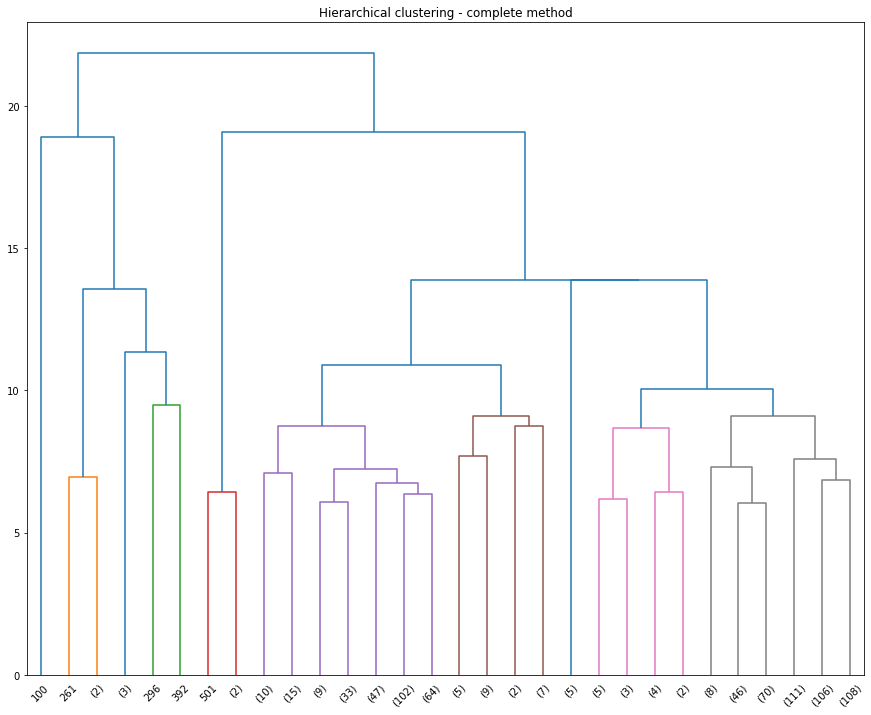

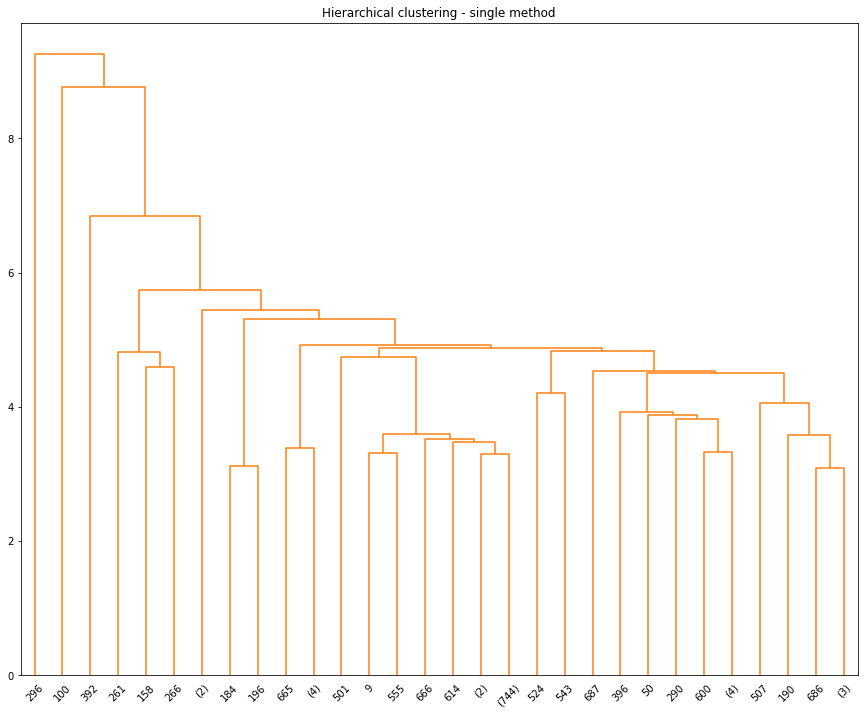

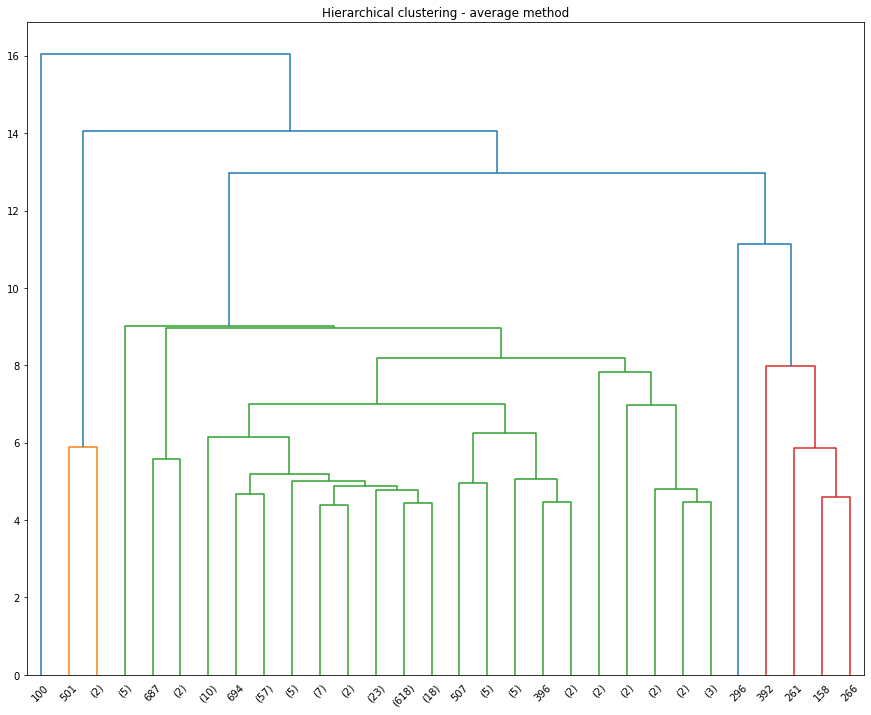

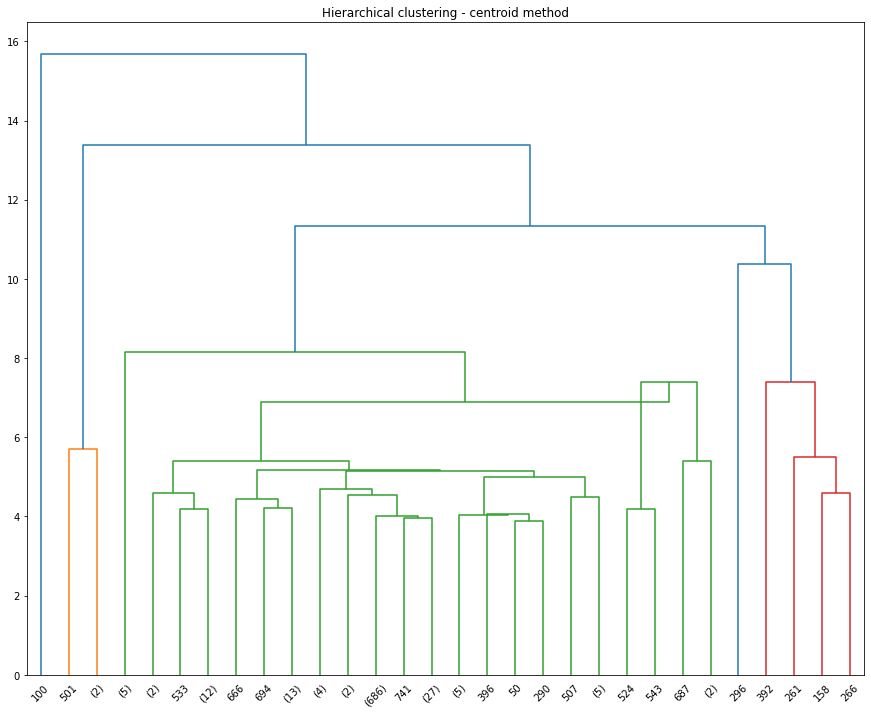

In [16]:
data_link_list = []
for method in methods:
    data_link_list.append(hierarchical_clustering(clustering_df_array, method, 8, clustering_scores_df))

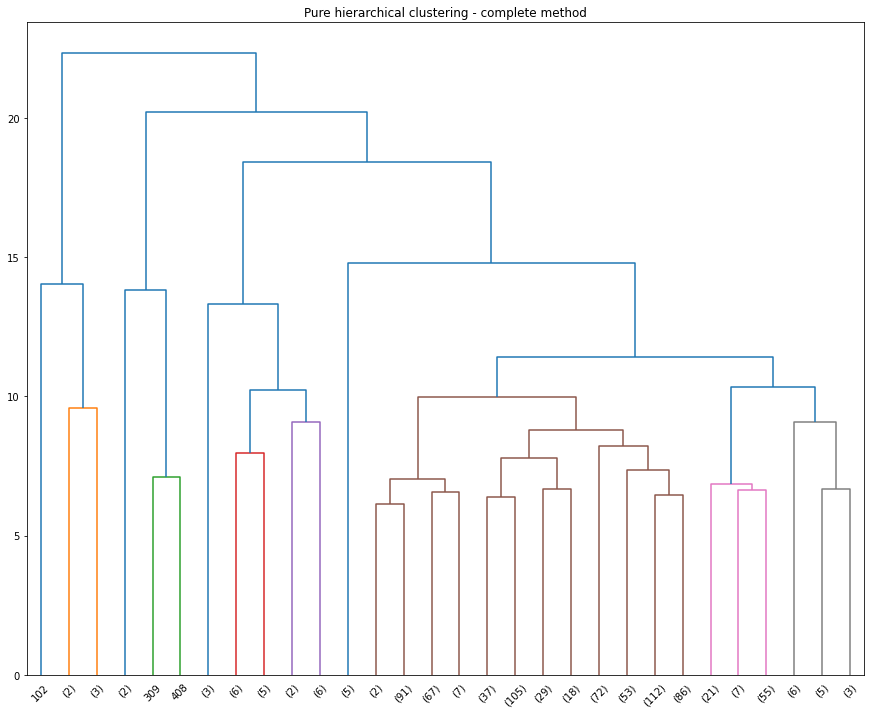

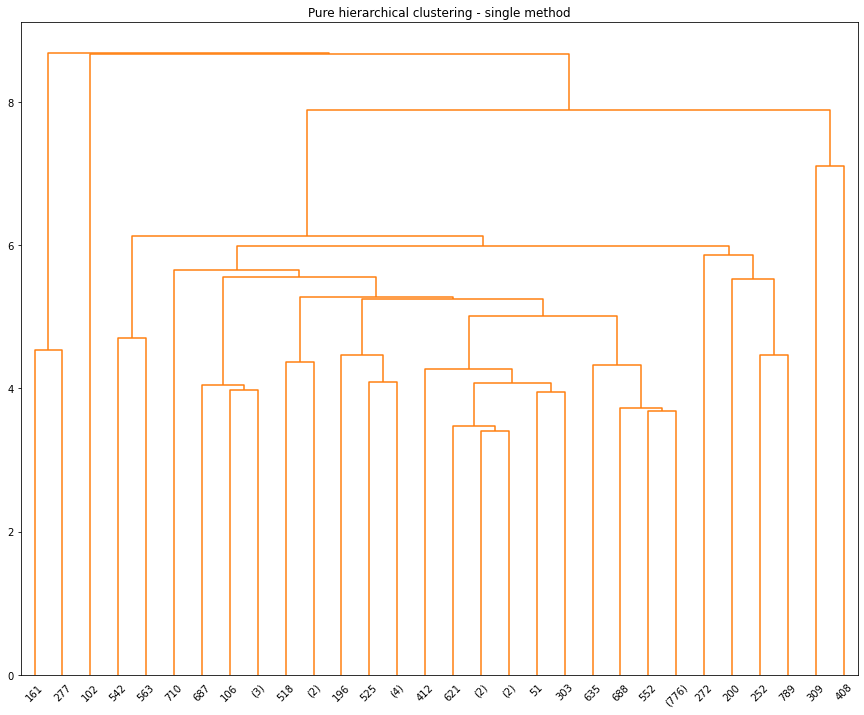

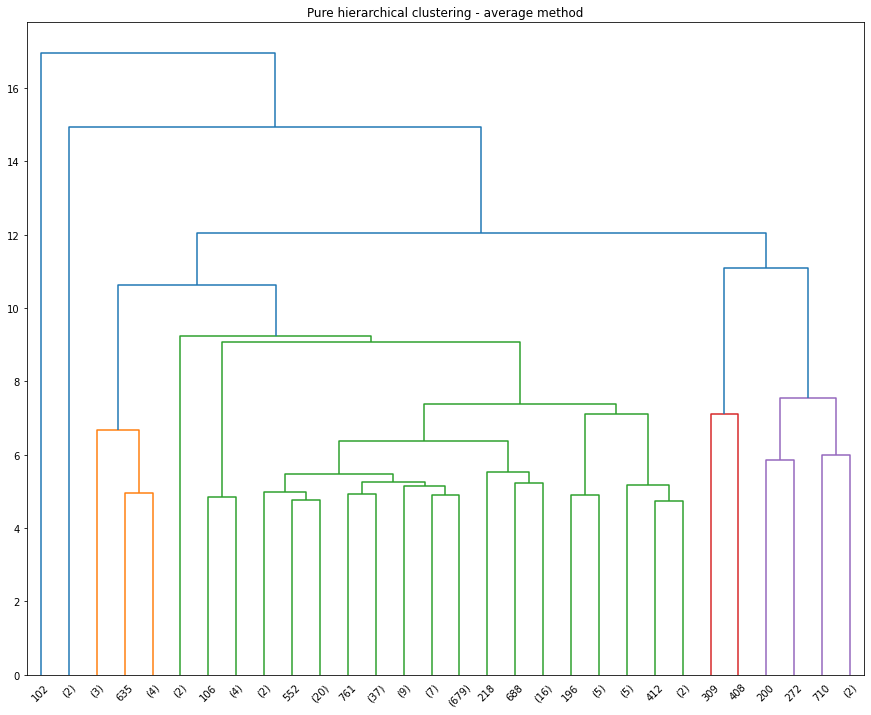

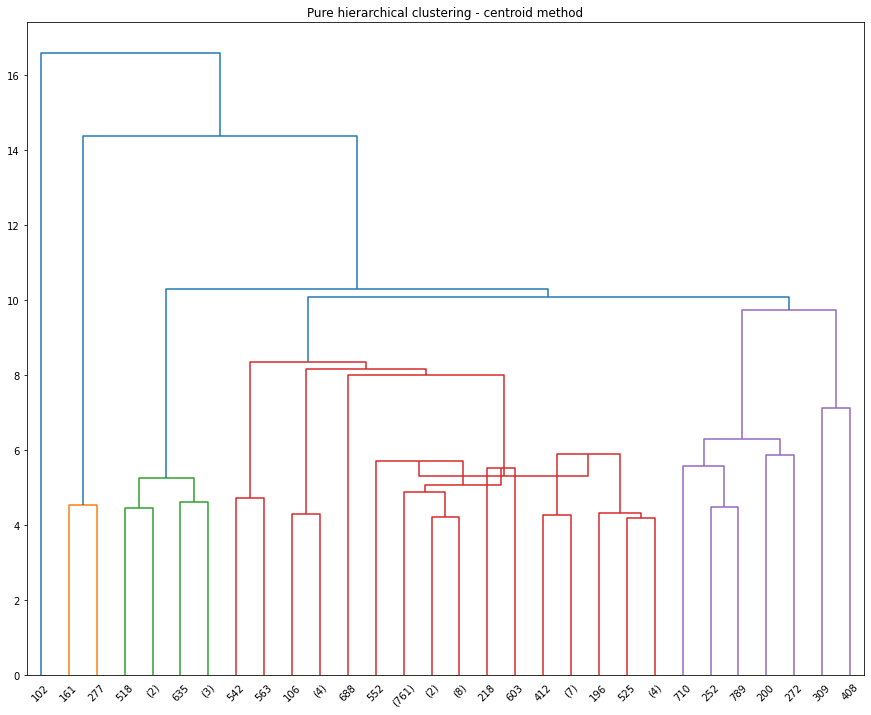

In [17]:
pure_data_link_list = []
for method in methods:
    pure_data_link_list.append(hierarchical_clustering(pure_clustering_df_array, method, 8, clustering_scores_df, pure=1))

In [18]:
clustering_scores_df

,silhouette,SSE
hierarchical_complete,0.203623,6400.144496
hierarchical_single,0.483512,8302.932387
hierarchical_average,0.450938,7709.385822
hierarchical_centroid,-2.000000,10179.000000
pure_hierarchical_complete,0.412928,8431.518332
pure_hierarchical_single,0.493912,9717.953546
pure_hierarchical_average,0.487836,8633.502676
pure_hierarchical_centroid,-2.000000,11382.000000


We plot only the cluster analysis of the complete method, because the others do not achieve great scores

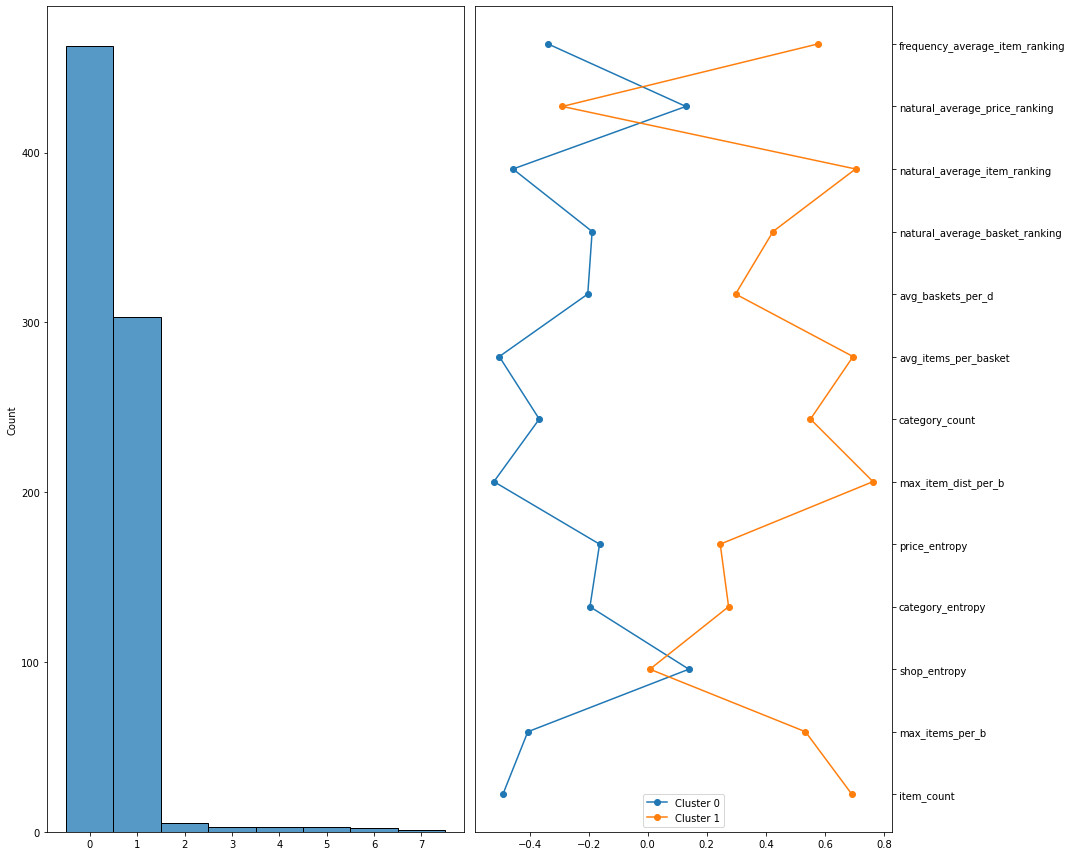

In [19]:
show_clusters(data_link_list[0], clustering_df_array, clustering_df, 8)

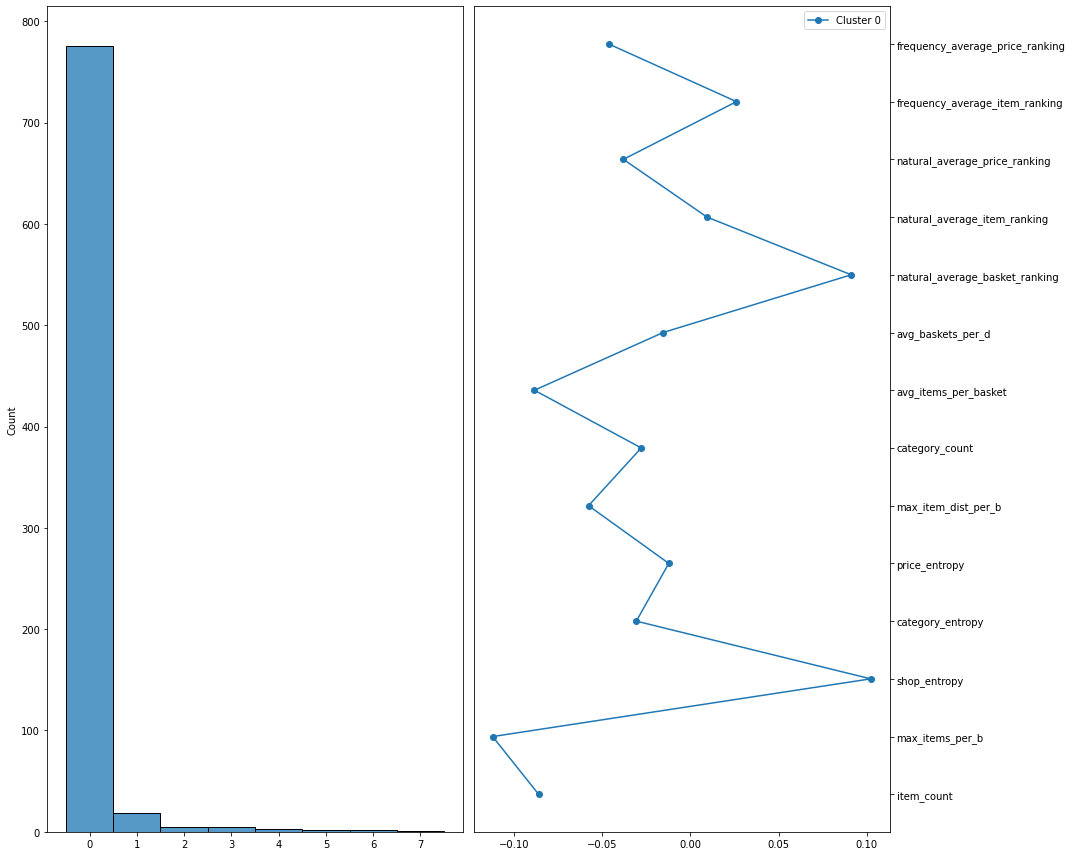

In [20]:
show_clusters(pure_data_link_list[0], pure_clustering_df_array, pure_clustering_df, 8)

# Others?

In [28]:
data = StandardScaler().fit_transform(u_df)

## FCM

In [29]:
initial_centers = kmeans_plusplus_initializer(data, 16, kmeans_plusplus_initializer.FARTHEST_CENTER_CANDIDATE).initialize()
fcm_instance = fcm(data, initial_centers)
fcm_instance.process()
clusters = fcm_instance.get_clusters()
centers = fcm_instance.get_centers()
# centers

In [30]:

sse = 0
for i, membership in enumerate(fcm_instance.get_membership()):
    distances_to_centers = [np.sqrt(np.sum((c - i) * (c - i))) for c in centers]
    sse += np.average(distances_to_centers, weights=membership)
clustering_scores.loc['fuzzy_C_Means', 'SSE'] = sse
sse

1402971.5140381567

In [31]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, data)
visualizer.show(pair_filter=[[0, 1], [0, 2]])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

## BSAS

In [ ]:
max_clusters = 6
threshold = 0.001
bsas_instance = bsas(data, max_clusters, threshold)
bsas_instance.process()

In [ ]:
clusters = bsas_instance.get_clusters()
representatives= bsas_instance.get_representatives()

In [ ]:
visualizer = cluster_visualizer_multidim()
visualizer.append_clusters(clusters, data)
visualizer.show(max_row_size=2)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
bsas_visualizer.show_clusters(data, clusters, representatives)

ValueError: Only objects with size dimension 1 (1D plot), 2 (2D plot) or 3 (3D plot) can be displayed. For multi-dimensional data use 'cluster_visualizer_multidim'.

## BIRCH

In [ ]:
birch_instance = birch(data, 6, 3)
birch_instance.process()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [ ]:
clusters = bsas_instance.get_clusters()
representatives = representatives = bsas_instance.get_representatives()

In [ ]:
bsas_visualizer.show_clusters(c_df, clusters, representatives)

KeyError: 0